<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Pandas for Exploratory Data Analysis: Inspecting Data

_Authors: Kevin Markham (DC)_

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Ensures that plots appear inside the notebook.
# Not necessary in some versions of Jupyter Notebook / JupyterLab.
%matplotlib inline

In [3]:
DATA_DIR = "../assets/data"

## Demo

Recall the start of our bare-bones model building process:

In [4]:
# Load the "Pandas" library -- think of it as spreadsheets in Python
import pandas as pd

# Use pandas to load in the data
ames_df = pd.read_csv("../assets/data/ames_mod.csv")

# Look at the first five rows
ames_df.head(5)

# Split the data into the column `y` we want to predict and the
# columns `X` we will use to make the predictions
X = ames_df.drop("SalePrice", axis="columns")
y = ames_df.loc[:, "SalePrice"]

All of these steps rely on the Pandas library -- Python's Swiss Army Knife for working with tabular data. In this lesson, we will learn to use Pandas to perform core data manipulation tasks such as selecting, sorting, filtering, summarizing, and joining.

## Pandas Data Types

Pandas provides two main data types: `DataFrame` and `Series`.

### DataFrame

Our matrix of house features `X` is a DataFrame:

In [5]:
X

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1451  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1452  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1453  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1454  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1455  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1451         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1452         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1453         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1454         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition    SF  
0         2   2008        WD         Normal  1710  
1         5   2007        WD         Normal  1262  
2         9   2008        WD         Normal  1786  
3         2   2006        WD        Abnorml  1717  
4        12   2008        WD         Normal  2198  
...     ...    ...       ...            ...   ...  
1451      8   2007        WD         Normal  1647  
1452      2   2010        WD         Normal  2073  
1453      5   2010        WD         Normal  2340  
1454      4   2010        WD         Normal  1078  
1455      6   2008        WD         Normal  1256  

[1456 rows x 81 columns]

- A DataFrame arranges data in rows and columns, like an Excel table.
- The `row index` contains a label for each row.
- The `column index` contains a label for each column.

When someone talks about **the** index of a DataFrame, they are generally referring to the `row index`.

### Series

Our vector of house prices is a Series.

In [6]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1451    175000
1452    210000
1453    266500
1454    142125
1455    147500
Name: SalePrice, Length: 1456, dtype: int64

- A Series is one-dimensional, whereas a DataFrame is two-dimensional.
- A Series has a single index that's analogous to a DataFrame row index and a `name` that's analogous to one value from a DataFrame column index.

> **Side note**: It is possible to have a one-column DataFrame. Sometimes the difference between a one-column DataFrame and a Series matters, for instance when you are trying to use a method that is defined for a Series but not for a DataFrame.

In [7]:
# Get SalePrice as a one-column DataFrame instead of a Series
ames_df.loc[:, ["SalePrice"]]

SalePrice
0        208500
1        181500
2        223500
3        140000
4        250000
...         ...
1451     175000
1452     210000
1453     266500
1454     142125
1455     147500

[1456 rows x 1 columns]

## DataFrame Methods and Attributes

- An **attribute** is a piece of information about a class instance. You use dot syntax to access it (e.g., ames_df.shape).
- A **method** is a function that is defined for a specific class (e.g. Series, DataFrame). You use dot syntax to call it, with parentheses for passing in arguments.

*View row index*

In [8]:
ames_df.index

RangeIndex(start=0, stop=1456, step=1)

*View column index*

In [9]:
ames_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

*Select first n rows, 5 by default*

In [10]:
ames_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolQC Fence MiscFeature MiscVal MoSold YrSold  \
0         Lvl    AllPub  ...    NaN   NaN         NaN       0      2   2008   
1         Lvl    AllPub  ...    NaN   NaN         NaN       0      5   2007   
2         Lvl    AllPub  ...    NaN   NaN         NaN       0      9   2008   
3         Lvl    AllPub  ...    NaN   NaN         NaN       0      2   2006   
4         Lvl    AllPub  ...    NaN   NaN         NaN       0     12   2008   

  SaleType  SaleCondition  SalePrice    SF  
0       WD         Normal     208500  1710  
1       WD         Normal     181500  1262  
2       WD         Normal     223500  1786  
3       WD        Abnorml     140000  1717  
4       WD         Normal     250000  2198  

[5 rows x 82 columns]

*Select first 2 rows*

In [11]:
ames_df.head(2)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   

  LandContour Utilities  ... PoolQC Fence MiscFeature MiscVal MoSold YrSold  \
0         Lvl    AllPub  ...    NaN   NaN         NaN       0      2   2008   
1         Lvl    AllPub  ...    NaN   NaN         NaN       0      5   2007   

  SaleType  SaleCondition  SalePrice    SF  
0       WD         Normal     208500  1710  
1       WD         Normal     181500  1262  

[2 rows x 82 columns]

*Select last 2 rows*

In [12]:
ames_df.tail(2)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1454  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1455  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolQC Fence MiscFeature MiscVal MoSold  \
1454         Lvl    AllPub  ...    NaN   NaN         NaN       0      4   
1455         Lvl    AllPub  ...    NaN   NaN         NaN       0      6   

     YrSold SaleType  SaleCondition  SalePrice    SF  
1454   2010       WD         Normal     142125  1078  
1455   2008       WD         Normal     147500  1256  

[2 rows x 82 columns]

*See the types of the columns*

In [13]:
ames_df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
SF                 int64
Length: 82, dtype: object

*Get the number of rows and columns*

In [14]:
ames_df.shape

(1456, 82)

*Get a concise summary of DataFrame contents "from the computer's perspective"*

In [15]:
ames_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 82 columns):
Id               1456 non-null int64
MSSubClass       1456 non-null int64
MSZoning         1456 non-null object
LotFrontage      1197 non-null float64
LotArea          1456 non-null int64
Street           1456 non-null object
Alley            91 non-null object
LotShape         1456 non-null object
LandContour      1456 non-null object
Utilities        1456 non-null object
LotConfig        1456 non-null object
LandSlope        1456 non-null object
Neighborhood     1456 non-null object
Condition1       1456 non-null object
Condition2       1456 non-null object
BldgType         1456 non-null object
HouseStyle       1456 non-null object
OverallQual      1456 non-null int64
OverallCond      1456 non-null int64
YearBuilt        1456 non-null int64
YearRemodAdd     1456 non-null int64
RoofStyle        1456 non-null object
RoofMatl         1456 non-null object
Exterior1st      1456 non-n

*Get descriptive statistics for numeric columns*

In [16]:
ames_df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1456.000000  1456.000000  1197.000000    1456.000000  1456.000000   
mean    729.967033    56.888736    69.693400   10448.784341     6.088599   
std     421.722909    42.358363    23.054474    9860.763449     1.369669   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     364.750000    20.000000    59.000000    7538.750000     5.000000   
50%     730.500000    50.000000    69.000000    9468.500000     6.000000   
75%    1094.250000    70.000000    80.000000   11588.000000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond   YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1456.000000  1456.00000   1456.000000  1448.000000  1456.000000  ...   
mean      5.576236  1971.18544   1984.819368   102.087707   436.991071  ...   
std       1.113966    30.20159     20.652143   177.338930   430.255052  ...   
min       1.000000  1872.00000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.00000   1966.750000     0.000000     0.000000  ...   
50%       5.000000  1972.00000   1993.500000     0.000000   381.000000  ...   
75%       6.000000  2000.00000   2004.000000   164.250000   706.500000  ...   
max       9.000000  2010.00000   2010.000000  1600.000000  2188.000000  ...   

       OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea  \
count  1456.000000    1456.000000  1456.000000  1456.000000  1456.000000   
mean     46.221154      22.014423     3.418956    15.102335     2.055632   
std      65.352424      61.192248    29.357056    55.828405    35.383772   
min       0.000000       0.000000     0.000000     0.000000     0.000000   
25%       0.000000       0.000000     0.000000     0.000000     0.000000   
50%      24.000000       0.000000     0.000000     0.000000     0.000000   
75%      68.000000       0.000000     0.000000     0.000000     0.000000   
max     547.000000     552.000000   508.000000   480.000000   738.000000   

            MiscVal       MoSold       YrSold      SalePrice           SF  
count   1456.000000  1456.000000  1456.000000    1456.000000  1456.000000  
mean      43.608516     6.326236  2007.817308  180151.233516  1500.641484  
std      496.799265     2.698356     1.329394   76696.592530   492.127703  
min        0.000000     1.000000  2006.000000   34900.000000   334.000000  
25%        0.000000     5.000000  2007.000000  129900.000000  1122.750000  
50%        0.000000     6.000000  2008.000000  163000.000000  1456.000000  
75%        0.000000     8.000000  2009.000000  214000.000000  1772.500000  
max    15500.000000    12.000000  2010.000000  625000.000000  3627.000000  

[8 rows x 39 columns]

*Get descriptive statistics for non-numeric columns*

In [17]:
ames_df.describe(include=object)

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1456   1456    91     1456        1456      1456      1456   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1147   1450    50      925        1309      1455      1051   

       LandSlope Neighborhood Condition1  ... GarageType GarageFinish  \
count       1456         1456       1456  ...       1375         1375   
unique         3           25          9  ...          6            3   
top          Gtl        NAmes       Norm  ...     Attchd          Unf   
freq        1378          225       1258  ...        867          605   

       GarageQual GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType  \
count        1375       1375       1456      5    280          54     1456   
unique          5          5          3      3      4           4        9   
top            TA         TA          Y     Fa  MnPrv        Shed       WD   
freq         1307       1322       1336      2    156          49     1265   

       SaleCondition  
count           1456  
unique             6  
top           Normal  
freq            1197  

[4 rows x 43 columns]

*Get the means of the numeric columns*

In [18]:
ames_df.mean()

Id                  729.967033
MSSubClass           56.888736
LotFrontage          69.693400
LotArea           10448.784341
OverallQual           6.088599
OverallCond           5.576236
YearBuilt          1971.185440
YearRemodAdd       1984.819368
MasVnrArea          102.087707
BsmtFinSF1          436.991071
BsmtFinSF2           46.677198
BsmtUnfSF           566.990385
TotalBsmtSF        1050.658654
1stFlrSF           1157.108516
2ndFlrSF            343.532967
LowQualFinSF          5.860577
GrLivArea          1506.502060
BsmtFullBath          0.423764
BsmtHalfBath          0.057005
FullBath              1.561813
HalfBath              0.381181
BedroomAbvGr          2.864698
KitchenAbvGr          1.046703
TotRmsAbvGrd          6.506181
Fireplaces            0.609203
GarageYrBlt        1978.440000
GarageCars            1.764423
GarageArea          471.568681
WoodDeckSF           93.833791
OpenPorchSF          46.221154
EnclosedPorch        22.014423
3SsnPorch             3.418956
ScreenPo

*Load "users.tbl" from `DATA_DIR`. We need to tell Pandas that this file uses "|" instead of the more common "," between values.*

In [19]:
users_path = f"{DATA_DIR}/user.tbl"
users = pd.read_csv(users_path, sep="|")

**Exercise**

*Time:* 5 mins\
*Format:* Individual\
*Post answers:* No

- Display the first 30 rows.

In [20]:
users.head(30)

user_id  age gender     occupation zip_code
0         1   24      M     technician    85711
1         2   53      F          other    94043
2         3   23      M         writer    32067
3         4   24      M     technician    43537
4         5   33      F          other    15213
5         6   42      M      executive    98101
6         7   57      M  administrator    91344
7         8   36      M  administrator    05201
8         9   29      M        student    01002
9        10   53      M         lawyer    90703
10       11   39      F          other    30329
11       12   28      F          other    06405
12       13   47      M       educator    29206
13       14   45      M      scientist    55106
14       15   49      F       educator    97301
15       16   21      M  entertainment    10309
16       17   30      M     programmer    06355
17       18   35      F          other    37212
18       19   40      M      librarian    02138
19       20   42      F      homemaker    95660
20       21   26      M         writer    30068
21       22   25      M         writer    40206
22       23   30      F         artist    48197
23       24   21      F         artist    94533
24       25   39      M       engineer    55107
25       26   49      M       engineer    21044
26       27   40      F      librarian    30030
27       28   32      M         writer    55369
28       29   41      M     programmer    94043
29       30    7      M        student    55436

- Display the last 20 rows.

In [21]:
users.tail(20)

user_id  age gender     occupation zip_code
923      924   29      M          other    11753
924      925   18      F       salesman    49036
925      926   49      M  entertainment    01701
926      927   23      M     programmer    55428
927      928   21      M        student    55408
928      929   44      M      scientist    53711
929      930   28      F      scientist    07310
930      931   60      M       educator    33556
931      932   58      M       educator    06437
932      933   28      M        student    48105
933      934   61      M       engineer    22902
934      935   42      M         doctor    66221
935      936   24      M          other    32789
936      937   48      M       educator    98072
937      938   38      F     technician    55038
938      939   26      F        student    33319
939      940   32      M  administrator    02215
940      941   20      M        student    97229
941      942   48      F      librarian    78209
942      943   22      M        student    77841

- Use the built-in Python function `type` to get the type of `users`.

In [22]:
type(users)

pandas.core.frame.DataFrame

- Get the row index.

In [23]:
users.index

RangeIndex(start=0, stop=943, step=1)

- Get the column names.

In [24]:
users.columns

Index(['user_id', 'age', 'gender', 'occupation', 'zip_code'], dtype='object')

- Get the data types of the columns.

In [25]:
users.dtypes

user_id        int64
age            int64
gender        object
occupation    object
zip_code      object
dtype: object

- Get the number of rows and columns.

In [26]:
users.shape

(943, 5)

- Get a concise summary of the contents of `users` (types, memory use, etc.)

In [27]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
user_id       943 non-null int64
age           943 non-null int64
gender        943 non-null object
occupation    943 non-null object
zip_code      943 non-null object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


- Get summary statistics for numeric columns of `users`.

In [28]:
users.describe()

user_id         age
count  943.000000  943.000000
mean   472.000000   34.051962
std    272.364951   12.192740
min      1.000000    7.000000
25%    236.500000   25.000000
50%    472.000000   31.000000
75%    707.500000   43.000000
max    943.000000   73.000000

- Get summary statistics for non-numeric columns of `users`.

In [29]:
users.describe(include=object)

gender occupation zip_code
count     943        943      943
unique      2         21      795
top         M    student    55414
freq      670        196        9

$\blacksquare$

## Selecting Rows and Columns

There are many ways to slice DataFrames.

### Recommended Approach

Use `.loc` and `.iloc`.

In [30]:
ames_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolQC Fence MiscFeature MiscVal MoSold YrSold  \
0         Lvl    AllPub  ...    NaN   NaN         NaN       0      2   2008   
1         Lvl    AllPub  ...    NaN   NaN         NaN       0      5   2007   
2         Lvl    AllPub  ...    NaN   NaN         NaN       0      9   2008   
3         Lvl    AllPub  ...    NaN   NaN         NaN       0      2   2006   
4         Lvl    AllPub  ...    NaN   NaN         NaN       0     12   2008   

  SaleType  SaleCondition  SalePrice    SF  
0       WD         Normal     208500  1710  
1       WD         Normal     181500  1262  
2       WD         Normal     223500  1786  
3       WD        Abnorml     140000  1717  
4       WD         Normal     250000  2198  

[5 rows x 82 columns]

`.loc` (short for "location") allows you to select rows and columns by **name**.

*Select columns "Id" and "MSSubClass" using .loc, passing in both column names*

In [31]:
ames_df.loc[:, ["Id", "MSSubClass"]]

Id  MSSubClass
0        1          60
1        2          20
2        3          60
3        4          70
4        5          60
...    ...         ...
1451  1456          60
1452  1457          20
1453  1458          70
1454  1459          20
1455  1460          20

[1456 rows x 2 columns]

Equivalent SQL:

```sql
SELECT Id, MSSubClass
FROM ames_df;
```

> **Side note:** "Equivalent SQL" is intended to help students who are familiar with SQL make the leap to Pandas. Ignore it if you do not find it helpful; you do not need to learn SQL for this course. I do not have a good way to test it, so please let me know if you see any errors. Note that there are many "dialects" of SQL that have slightly different features and syntax.

*Select columns "Id" and "MSSubClass" using .loc, passing in a range of column names*

In [32]:
ames_df.loc[:, :"MSSubClass"]

Id  MSSubClass
0        1          60
1        2          20
2        3          60
3        4          70
4        5          60
...    ...         ...
1451  1456          60
1452  1457          20
1453  1458          70
1454  1459          20
1455  1460          20

[1456 rows x 2 columns]

`.iloc` (short for "integer location") allows you to select rows and columns by **position**.

*Select columns "Id" and "MSSubClass" using `.iloc`, passing in a range of indices*

In [33]:
ames_df.iloc[:, :2]

Id  MSSubClass
0        1          60
1        2          20
2        3          60
3        4          70
4        5          60
...    ...         ...
1451  1456          60
1452  1457          20
1453  1458          70
1454  1459          20
1455  1460          20

[1456 rows x 2 columns]

**Note:** It is generally good practice to use column names (`.loc`) rather than positions (`.iloc`).

*Select rows 1 and 2 using `.loc`*

In [34]:
ames_df.loc[1:2, :]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   

  LandContour Utilities  ... PoolQC Fence MiscFeature MiscVal MoSold YrSold  \
1         Lvl    AllPub  ...    NaN   NaN         NaN       0      5   2007   
2         Lvl    AllPub  ...    NaN   NaN         NaN       0      9   2008   

  SaleType  SaleCondition  SalePrice    SF  
1       WD         Normal     181500  1262  
2       WD         Normal     223500  1786  

[2 rows x 82 columns]

*Select rows 1 and 2 using `.iloc`*

In [35]:
ames_df.iloc[1:3, :]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   

  LandContour Utilities  ... PoolQC Fence MiscFeature MiscVal MoSold YrSold  \
1         Lvl    AllPub  ...    NaN   NaN         NaN       0      5   2007   
2         Lvl    AllPub  ...    NaN   NaN         NaN       0      9   2008   

  SaleType  SaleCondition  SalePrice    SF  
1       WD         Normal     181500  1262  
2       WD         Normal     223500  1786  

[2 rows x 82 columns]

*Select row 1 from columns "Id" and "MSSubClass" using `.loc`. What is the type of the result?*

In [36]:
ames_df.loc[1, ["Id", "MSSubClass"]]

Id             2
MSSubClass    20
Name: 1, dtype: object

*Select row 1 from columns "Id" and "MSSubClass" using .loc so that the result is a DataFrame*

In [37]:
ames_df.loc[[1], ["Id", "MSSubClass"]]

Id  MSSubClass
1   2          20

*Select row 1 from columns "SalePrice" and "SF" using `.iloc`*

In [38]:
ames_df.iloc[1, -2:]

SalePrice    181500
SF             1262
Name: 1, dtype: object

`.loc` and `.iloc` also work on `Series` objects, but with a `Series` there is only one dimension to select on.

*Look at our sale price Series*

In [39]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1451    175000
1452    210000
1453    266500
1454    142125
1455    147500
Name: SalePrice, Length: 1456, dtype: int64

*Use `.loc` to select the first two items*

In [40]:
y.loc[:1]

0    208500
1    181500
Name: SalePrice, dtype: int64

*Use `.iloc` to select the first two items*

In [41]:
y.iloc[:2]

0    208500
1    181500
Name: SalePrice, dtype: int64

### Alternative approaches

I do not recommend using these approaches, but you should be able to recognize them.

#### Dictionary-Style Column Selection

*Select a single column*

In [42]:
ames_df["SalePrice"]

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1451    175000
1452    210000
1453    266500
1454    142125
1455    147500
Name: SalePrice, Length: 1456, dtype: int64

*Select multiple columns*

In [43]:
ames_df[["Id", "MSSubClass"]]

Id  MSSubClass
0        1          60
1        2          20
2        3          60
3        4          70
4        5          60
...    ...         ...
1451  1456          60
1452  1457          20
1453  1458          70
1454  1459          20
1455  1460          20

[1456 rows x 2 columns]

*Slice into a series*

In [44]:
ames_df["SalePrice"][0]

208500

#### Dot Syntax

In [45]:
ames_df.SalePrice

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1451    175000
1452    210000
1453    266500
1454    142125
1455    147500
Name: SalePrice, Length: 1456, dtype: int64

*Slice into a series*

In [46]:
ames_df.SalePrice[1]

181500

> **Side Note:** There is no consensus about the "best way" to slice DataFrames, but here are some reasons that lead me to prefer `.loc` and `.iloc`:
> 
> - They are more flexible:
>     - You can select a single row with `df.loc[row_label, :]` but not with slice or Slicing into a series.
>     - You can select a list of rows with `df.loc[[row_label1, row_label2], :]` but not with slice or dot syntax.
>     - You can slice columns with `df.loc[:, "A":"C"]` but not with slice or dot syntax.
>     - Unlike `.` syntax, `.loc` and `.iloc` allow you to select columns that are not valid Python variable names (e.g. columns whose names start with numbers or contain spaces) or that have the same name as a variable or DataFrame method or attribute.
> - They are more explicit:
>     - They show clearly where you are operating on rows and where you are operating on columns. (Square brackets select columns when a string is passed and filter rows when a Boolean series is passed, which can be confusing, whereas `.loc` always operates on rows before the comma and on columns after the comma.)
>     - They show clearly whether you are selecting by name or by position.
> - They consistently allow you to assign values to elements of a DataFrame when selecting on both rows and columns. (See [this Stack Overflow post](https://stackoverflow.com/questions/48409128/what-is-the-difference-between-using-loc-and-using-just-square-brackets-to-filte).)
> 
> `.loc` and `.iloc` do require more keystrokes than the alternatives, but **getting confused about what your code is doing will cost you far more time than banging out a few more characters**.

There are also additional attributes such as `.ix`, `.at`, and `.iat`, but there is a consensus that you should use `.loc` and `.iloc` over those alternatives.

**Exercise**

*Time:* 7 mins\
*Format:* Pairs\
*Post answers:* Yes

Use the `users` DataFrame for the following exercises. (This DataFrame should be loaded into memory already. Run the code above if it is not.)

- Select the "gender" column using `.loc`.

In [47]:
users.loc[:, "gender"]

0      M
1      F
2      M
3      M
4      F
      ..
938    F
939    M
940    M
941    F
942    M
Name: gender, Length: 943, dtype: object

- Select rows 10-20 (inclusive) of the "gender" column using `.loc.`

In [48]:
users.loc[10:20, "gender"]

10    F
11    F
12    M
13    M
14    F
15    M
16    M
17    F
18    M
19    F
20    M
Name: gender, dtype: object

- Select the "gender" column using `.iloc`.

In [49]:
users.iloc[:, 2]

0      M
1      F
2      M
3      M
4      F
      ..
938    F
939    M
940    M
941    F
942    M
Name: gender, Length: 943, dtype: object

- Select rows 10-20 (inclusive) of the "gender" column using `.iloc`.

In [50]:
users.iloc[10:21, 2]

10    F
11    F
12    M
13    M
14    F
15    M
16    M
17    F
18    M
19    F
20    M
Name: gender, dtype: object

- Get the type of the object created in the previous cell (NOT the type of the data it contains).

In [51]:
type(users.iloc[10:21, 2])

pandas.core.series.Series

- Get summary statistics for all numeric columns.

In [52]:
users.describe()

user_id         age
count  943.000000  943.000000
mean   472.000000   34.051962
std    272.364951   12.192740
min      1.000000    7.000000
25%    236.500000   25.000000
50%    472.000000   31.000000
75%    707.500000   43.000000
max    943.000000   73.000000

- Get summary statistics about all `object` columns.

In [53]:
users.describe(include=object)

gender occupation zip_code
count     943        943      943
unique      2         21      795
top         M    student    55414
freq      670        196        9

- Calculate the mean of the ages.

In [54]:
users.loc[:, "age"].mean()

34.05196182396607

$\blacksquare$

## Frequency Distributions

*Get the counts of the gender values*

In [55]:
users.loc[:, "gender"].value_counts()  # most useful for categorical variables

M    670
F    273
Name: gender, dtype: int64

Equivalent SQL:

```sql
SELECT gender, COUNT(*)
FROM users
GROUP BY gender;
```

*Make a bar plot of the value counts*

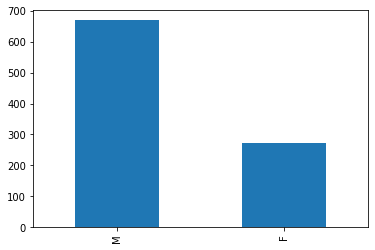

In [56]:
ax = users.loc[:, "gender"].value_counts().plot.bar()

*Plot age histogram with plot title and axis labels*

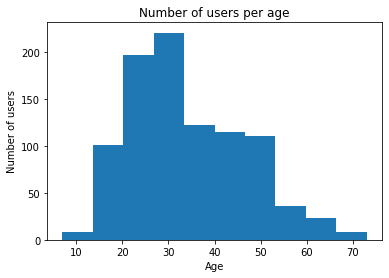

In [57]:
ax = users.loc[:, "age"].plot.hist()
ax.set_xlabel("Age")
ax.set_ylabel("Number of users")
# fmt: off
ax.set_title("Number of users per age");
# fmt: on

**Notes:**

- `ax` is a Matplotlib `Axes` object. It contains all of the elements of a single plot. It is contained with a `Figure` object that you can think of as the canvas on which the `Axes` object is displayed.

![](https://files.realpython.com/media/fig_map.bc8c7cabd823.png)

- You will often see people create plots in a different way, using `matplotlib` functions calls such as `plt.title("Number of users on page")` rather than `Axes` methods such as `ax.set_title("Number of users on page")`. **I strongly recommend that you follow the approach illustrated here**: see http://pbpython.com/effective-matplotlib.html and https://realpython.com/python-matplotlib-guide/.
- Recent versions of Jupyter show plots inside the notebook automatically. Older versions require running `%matplotlib inline` to activate this feature. Outside Jupyter, you typically need to run `plt.show()` to render a plot in a popup window.

**Exercise**

*Time:* 4 mins\
*Format:* Individual\
*Post answers:* No

Use the `drinks` DataFrame for this exercise.

*Read drinks.csv into a DataFrame called "drinks"*

In [58]:
drinks_path = f"{DATA_DIR}/drinks.csv"
drinks = pd.read_csv(drinks_path)

- Display the first five rows.

In [59]:
drinks.head()

country  beer_servings  spirit_servings  wine_servings  \
0  Afghanistan              0                0              0   
1      Albania             89              132             54   
2      Algeria             25                0             14   
3      Andorra            245              138            312   
4       Angola            217               57             45   

   total_litres_of_pure_alcohol continent  
0                           0.0        AS  
1                           4.9        EU  
2                           0.7        AF  
3                          12.4        EU  
4                           5.9        AF

- Display the last five rows.

In [60]:
drinks.tail()

country  beer_servings  spirit_servings  wine_servings  \
188  Venezuela            333              100              3   
189    Vietnam            111                2              1   
190      Yemen              6                0              0   
191     Zambia             32               19              4   
192   Zimbabwe             64               18              4   

     total_litres_of_pure_alcohol continent  
188                           7.7        SA  
189                           2.0        AS  
190                           0.1        AS  
191                           2.5        AF  
192                           4.7        AF

- Display the index.

In [61]:
drinks.index

RangeIndex(start=0, stop=193, step=1)

- Display the column types.

In [62]:
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

- Display the number of rows and columns.

In [63]:
drinks.shape

(193, 6)

- Display the "beer_servings" column as a Series.

In [64]:
drinks.loc[:, "beer_servings"]

0        0
1       89
2       25
3      245
4      217
      ... 
188    333
189    111
190      6
191     32
192     64
Name: beer_servings, Length: 193, dtype: int64

- Calculate the average "beer_servings" for the entire dataset.

In [65]:
drinks.loc[:, "beer_servings"].mean()

106.16062176165804

- Count the number of occurrences of each "continent" value.

In [66]:
drinks.loc[:, "continent"].value_counts()

AF    53
EU    45
AS    44
OC    16
SA    12
Name: continent, dtype: int64

- **BONUS:** What is wrong with the last result? How did the problem arise?

In [67]:
drinks.loc[drinks.loc[:, "continent"].isna(), :]

country  beer_servings  spirit_servings  \
5               Antigua & Barbuda            102              128   
11                        Bahamas            122              176   
14                       Barbados            143              173   
17                         Belize            263              114   
32                         Canada            240              122   
41                     Costa Rica            149               87   
43                           Cuba             93              137   
50                       Dominica             52              286   
51             Dominican Republic            193              147   
54                    El Salvador             52               69   
68                        Grenada            199              438   
69                      Guatemala             53               69   
73                          Haiti              1              326   
74                       Honduras             69               98   
84                        Jamaica             82               97   
109                        Mexico            238               68   
122                     Nicaragua             78              118   
130                        Panama            285              104   
143             St. Kitts & Nevis            194              205   
144                     St. Lucia            171              315   
145  St. Vincent & the Grenadines            120              221   
174             Trinidad & Tobago            197              156   
184                           USA            249              158   

     wine_servings  total_litres_of_pure_alcohol continent  
5               45                           4.9       NaN  
11              51                           6.3       NaN  
14              36                           6.3       NaN  
17               8                           6.8       NaN  
32             100                           8.2       NaN  
41              11                           4.4       NaN  
43               5                           4.2       NaN  
50              26                           6.6       NaN  
51               9                           6.2       NaN  
54               2                           2.2       NaN  
68              28                          11.9       NaN  
69               2                           2.2       NaN  
73               1                           5.9       NaN  
74               2                           3.0       NaN  
84               9                           3.4       NaN  
109              5                           5.5       NaN  
122              1                           3.5       NaN  
130             18                           7.2       NaN  
143             32                           7.7       NaN  
144             71                          10.1       NaN  
145             11                           6.3       NaN  
174              7                           6.4       NaN  
184             84                           8.7       NaN


North America is missing because "NA" was read as indicating missing values.

$\blacksquare$

## Filtering

We can use simple operator comparisons on columns to extract relevant or drop irrelevant information.

### Filtering on a Single Condition

*Create a Boolean Series that tells us which users are under 20 years old*

In [68]:
is_young = users.loc[:, "age"] < 20
is_young

0      False
1      False
2      False
3      False
4      False
       ...  
938    False
939    False
940    False
941    False
942    False
Name: age, Length: 943, dtype: bool

Equivalent SQL:

```sql
SELECT age < 20
FROM users;
```

*Use that Series to filter rows*

In [69]:
users.loc[is_young, :]

user_id  age gender occupation zip_code
29        30    7      M    student    55436
35        36   19      F    student    93117
51        52   18      F    student    55105
56        57   16      M       none    84010
66        67   17      M    student    60402
..       ...  ...    ...        ...      ...
871      872   19      F    student    74078
879      880   13      M    student    83702
886      887   14      F    student    27249
903      904   17      F    student    61073
924      925   18      F   salesman    49036

[77 rows x 5 columns]

*Alternatively, combine the previous two steps -- which approach makes the code easier to read?*

In [70]:
users.loc[users.loc[:, "age"] < 20, :]

user_id  age gender occupation zip_code
29        30    7      M    student    55436
35        36   19      F    student    93117
51        52   18      F    student    55105
56        57   16      M       none    84010
66        67   17      M    student    60402
..       ...  ...    ...        ...      ...
871      872   19      F    student    74078
879      880   13      M    student    83702
886      887   14      F    student    27249
903      904   17      F    student    61073
924      925   18      F   salesman    49036

[77 rows x 5 columns]

Equivalent SQL:

```sql
SELECT *
FROM users
WHERE age < 20;
```

*Select "occupation" column from the filtered results*

In [71]:
users.loc[is_young, "occupation"]

29      student
35      student
51      student
56         none
66      student
         ...   
871     student
879     student
886     student
903     student
924    salesman
Name: occupation, Length: 77, dtype: object

Equivalent SQL:

```sql
SELECT occupation
FROM users
WHERE age < 20;
```

*Inspect the frequency distribution of the resulting Series*

In [72]:
users.loc[users.loc[:, "age"] < 20, "occupation"].value_counts()

student          64
other             4
none              3
writer            2
entertainment     2
artist            1
salesman          1
Name: occupation, dtype: int64

Equivalent SQL:

```sql
SELECT occupation, COUNT(*)
FROM users
WHERE age < 20
GROUP BY occupation;
```

### Filtering on Multiple Conditions

*Select users who are under 20 and male.*

In [73]:
users.loc[(users.loc[:, "age"] < 20) & (users.loc[:, "gender"] == "M"), :]

user_id  age gender     occupation zip_code
29        30    7      M        student    55436
56        57   16      M           none    84010
66        67   17      M        student    60402
67        68   19      M        student    22904
100      101   15      M        student    05146
109      110   19      M        student    77840
141      142   13      M          other    48118
178      179   15      M  entertainment    20755
220      221   19      M        student    20685
245      246   19      M        student    28734
256      257   17      M        student    77005
288      289   11      M           none    94619
290      291   19      M        student    44106
302      303   19      M        student    14853
319      320   19      M        student    24060
346      347   18      M        student    90210
366      367   17      M        student    37411
367      368   18      M        student    92113
374      375   17      M  entertainment    37777
392      393   19      M        student    83686
396      397   17      M        student    27514
424      425   19      M        student    58644
450      451   16      M        student    48446
452      453   18      M        student    06333
460      461   15      M        student    98102
470      471   10      M        student    77459
520      521   19      M        student    02146
527      528   18      M        student    55104
579      580   16      M        student    17961
581      582   17      M        student    93003
591      592   18      M        student    97520
618      619   17      M        student    44134
620      621   17      M        student    60402
623      624   19      M        student    30067
627      628   13      M           none    94306
631      632   18      M        student    55454
699      700   17      M        student    76309
709      710   19      M        student    92020
728      729   19      M        student    56567
746      747   19      M          other    93612
760      761   17      M        student    97302
816      817   19      M        student    60152
850      851   18      M          other    29646
862      863   17      M        student    60089
879      880   13      M        student    83702

**Notes:**

- To get the elementwise conjunction of two Boolean series (i.e. the result of applying "and" to each row), you use `&` rather than `and`.
- When you use `&` with an expression that uses a comparison operator, you need to put parentheses around the expression to get the right order of operations.

Equivalent SQL:

```sql
SELECT *
FROM users
WHERE age < 20
  AND gender = 'M';
```

*Select users who are under 20 or over sixty.*

In [74]:
users.loc[(users.loc[:, "age"] < 20) | (users.loc[:, "age"] > 60), :]

user_id  age gender occupation zip_code
29        30    7      M    student    55436
35        36   19      F    student    93117
51        52   18      F    student    55105
56        57   16      M       none    84010
66        67   17      M    student    60402
..       ...  ...    ...        ...      ...
879      880   13      M    student    83702
886      887   14      F    student    27249
903      904   17      F    student    61073
924      925   18      F   salesman    49036
933      934   61      M   engineer    22902

[99 rows x 5 columns]

**Note:** To get the elementwise disjunction of two Boolean series (i.e. the result of applying "or" to each row), you use `|` rather than `or`.

Equivalent SQL:

```sql
SELECT *
FROM users
WHERE age < 20
  OR age > 60;
```

*Use the `.isin()` method to find users who are doctors, lawyers, or engineers.*

In [75]:
# Don't do it this way:
users.loc[
    (users.loc[:, "occupation"] == "doctor")
    | (users.loc[:, "occupation"] == "lawyer")
    | (users.loc[:, "occupation"] == "engineer"),
    :,
]

user_id  age gender occupation zip_code
9         10   53      M     lawyer    90703
24        25   39      M   engineer    55107
25        26   49      M   engineer    21044
40        41   33      M   engineer    80525
60        61   36      M   engineer    30040
..       ...  ...    ...        ...      ...
881      882   35      M   engineer    40503
883      884   44      M   engineer    55337
915      916   27      M   engineer    N2L5N
933      934   61      M   engineer    22902
934      935   42      M     doctor    66221

[86 rows x 5 columns]

In [76]:
users.loc[users.loc[:, "occupation"].isin(["doctor", "lawyer", "engineer"]), :]

user_id  age gender occupation zip_code
9         10   53      M     lawyer    90703
24        25   39      M   engineer    55107
25        26   49      M   engineer    21044
40        41   33      M   engineer    80525
60        61   36      M   engineer    30040
..       ...  ...    ...        ...      ...
881      882   35      M   engineer    40503
883      884   44      M   engineer    55337
915      916   27      M   engineer    N2L5N
933      934   61      M   engineer    22902
934      935   42      M     doctor    66221

[86 rows x 5 columns]

*Select users who are NOT doctors, lawyers, or engineers*

In [77]:
users.loc[~users.loc[:, "occupation"].isin(["doctor", "lawyer", "engineer"]), :]

user_id  age gender     occupation zip_code
0          1   24      M     technician    85711
1          2   53      F          other    94043
2          3   23      M         writer    32067
3          4   24      M     technician    43537
4          5   33      F          other    15213
..       ...  ...    ...            ...      ...
938      939   26      F        student    33319
939      940   32      M  administrator    02215
940      941   20      M        student    97229
941      942   48      F      librarian    78209
942      943   22      M        student    77841

[857 rows x 5 columns]

**Note:** To get the elementwise negation of a Boolean series (i.e. the opposite of each value), you use `~` rather than `not`.

**Exercise**

*Time:* 3 mins\
*Format:* Individual\
*Post answers:* Yes

Use the `drinks` DataFrame for these exercises.

- Filter the DataFrame to include only European countries.

In [78]:
drinks.loc[drinks.loc[:, "continent"] == "EU", :]

country  beer_servings  spirit_servings  wine_servings  \
1               Albania             89              132             54   
3               Andorra            245              138            312   
7               Armenia             21              179             11   
9               Austria            279               75            191   
10           Azerbaijan             21               46              5   
15              Belarus            142              373             42   
16              Belgium            295               84            212   
21   Bosnia-Herzegovina             76              173              8   
25             Bulgaria            231              252             94   
42              Croatia            230               87            254   
44               Cyprus            192              154            113   
45       Czech Republic            361              170            134   
48              Denmark            224               81            278   
57              Estonia            224              194             59   
60              Finland            263              133             97   
61               France            127              151            370   
64              Georgia             52              100            149   
65              Germany            346              117            175   
67               Greece            133              112            218   
75              Hungary            234              215            185   
76              Iceland            233               61             78   
81              Ireland            313              118            165   
83                Italy             85               42            237   
93               Latvia            281              216             62   
98            Lithuania            343              244             56   
99           Luxembourg            236              133            271   
105               Malta            149              100            120   
111              Monaco              0                0              0   
113          Montenegro             31              114            128   
120         Netherlands            251               88            190   
126              Norway            169               71            129   
135              Poland            343              215             56   
136            Portugal            194               67            339   
139             Moldova            109              226             18   
140             Romania            297              122            167   
147          San Marino              0                0              0   
151              Serbia            283              131            127   
155            Slovakia            196              293            116   
156            Slovenia            270               51            276   
160               Spain            284              157            112   
165              Sweden            152               60            186   
166         Switzerland            185              100            280   
170           Macedonia            106               27             86   
180             Ukraine            206              237             45   
182      United Kingdom            219              126            195   

     total_litres_of_pure_alcohol continent  
1                             4.9        EU  
3                            12.4        EU  
7                             3.8        EU  
9                             9.7        EU  
10                            1.3        EU  
15                           14.4        EU  
16                           10.5        EU  
21                            4.6        EU  
25                           10.3        EU  
42                           10.2        EU  
44                            8.2        EU  
45                           11.8        EU  
48           

- Filter the DataFrame to include only European countries with more than 300 `wine_servings`.

In [79]:
drinks.loc[
    (drinks.loc[:, "continent"] == "EU") & (drinks.loc[:, "wine_servings"] > 300), :
]

country  beer_servings  spirit_servings  wine_servings  \
3     Andorra            245              138            312   
61     France            127              151            370   
136  Portugal            194               67            339   

     total_litres_of_pure_alcohol continent  
3                            12.4        EU  
61                           11.8        EU  
136                          11.0        EU

- Calculate the average "beer_servings" for all of Europe.

In [80]:
drinks.loc[drinks.loc[:, "continent"] == "EU", "beer_servings"].mean()

193.77777777777777

$\blacksquare$

## Easy Mode

The `pandas_profiling` package automatically generates an extensive report on the data in a DataFrame. It's no substitute for knowing what you're doing, but it can save you a lot of time getting started.

In [81]:
# Uncomment and run this cell to install pandas-profiling package
# !pip install --user pandas-profiling

You may need to **restart the kernel** after installing pandas-profiling, especially if you tried to import it before the installation and got an error.

If the pip installation doesn't work, you can try `conda install -c conda-forge pandas-profiling`.

In [82]:
# Import the package
import pandas_profiling

In [83]:
# Get report
profile = drinks.profile_report()
profile

In [84]:
# If the report isn't displaying for you, uncomment and run this cell
# profile.to_notebook_iframe()

In [85]:
# Uncomment and run the lines below to ensure that having installed `pandas_profiling`
# doesn't mess up your JupyterLab dependencies
# !pip install attr
# !pip uninstall attrs

## Summary

- `pandas` provides `Series` and `DataFrame` classes that facilitate working with tabular data.
- Use `.loc` to select rows and columns based on their **index values**.
- Use `.iloc` to select rows and columns based on their **positions**.
- When using `.loc` and `.iloc` with a DataFrame, row selection expressions go before a comma, and column selection expressions come after.
- The following sorts of expressions are valid for selecting rows and columns:
    - With `.loc`: Individual row/column index values (e.g. `df.loc[1, "a"]`)
    - With `.iloc`: Individual integers indicating row/column positions (e.g. `df.iloc[1, 3]`)
    - Sequences of the above (e.g. `df.loc[[1, 2], ["a", "b"]]`, `df.iloc[[1, 2], [2, 3]]`)
    - Slices of the above (e.g. `df.loc[:2, "a":"b"]`, or `df.iloc[:, 1:]`)
    - Boolean arrays